In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, StratifiedKFold
import os
from tensorflow.keras.regularizers import l2

In [2]:
# Directories for train and test data
train_dir = r'K:\PROJECT\ORGANISED DATASET\train'
test_dir = r'K:\PROJECT\ORGANISED DATASET\test'

In [3]:
# Data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,  # Apply shearing transformation
    zoom_range=0.2,  # Randomly zoom in or out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest',  # Fill empty pixels after transformation
    validation_split=0.2  # 20% of data used for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale test images only

In [4]:
# Flow from directories for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Flow from directory for testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4949 images belonging to 2 classes.
Found 1236 images belonging to 2 classes.
Found 1724 images belonging to 2 classes.


In [5]:
# Build the CNN model with L2 Regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Implementing K-fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Training fold 1...
Found 4949 images belonging to 2 classes.
Found 1236 images belonging to 2 classes.
Epoch 1/20
155/155 [==============================] - 562s 4s/step - loss: 1.2339 - accuracy: 0.7587 - val_loss: 0.8399 - val_accuracy: 0.7435
Epoch 2/20
155/155 [==============================] - 522s 3s/step - loss: 0.7457 - accuracy: 0.8097 - val_loss: 0.6408 - val_accuracy: 0.8252
Epoch 3/20
155/155 [==============================] - 537s 3s/step - loss: 0.6620 - accuracy: 0.8159 - val_loss: 0.6580 - val_accuracy: 0.7298
Epoch 4/20
155/155 [==============================] - 545s 4s/step - loss: 0.6146 - accuracy: 0.8117 - val_loss: 0.5665 - val_accuracy: 0.8212
Epoch 5/20
155/155 [==============================] - 544s 4s/step - loss: 0.5762 - accuracy: 0.8167 - val_loss: 0.4931 - val_accuracy: 0.8382
Epoch 6/20
155/155 [==============================] - 543s 3s/step - loss: 0.5579 - accuracy: 0.8149 - val_loss: 0.4858 - val_accuracy: 0.8261
Epoch 7/20
155/155 [===================

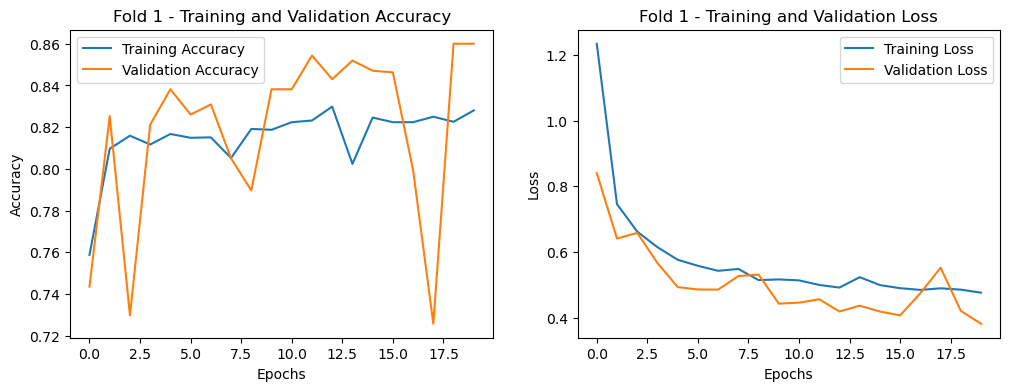

Training fold 2...
Found 4949 images belonging to 2 classes.
Found 1236 images belonging to 2 classes.
Epoch 1/20
155/155 [==============================] - 546s 4s/step - loss: 0.4931 - accuracy: 0.8155 - val_loss: 0.4119 - val_accuracy: 0.8463
Epoch 2/20
155/155 [==============================] - 517s 3s/step - loss: 0.4721 - accuracy: 0.8311 - val_loss: 0.4224 - val_accuracy: 0.8511
Epoch 3/20
155/155 [==============================] - 516s 3s/step - loss: 0.4887 - accuracy: 0.8135 - val_loss: 0.4147 - val_accuracy: 0.8495
Epoch 4/20
155/155 [==============================] - 515s 3s/step - loss: 0.4681 - accuracy: 0.8321 - val_loss: 0.3836 - val_accuracy: 0.8714
Epoch 5/20
155/155 [==============================] - 542s 3s/step - loss: 0.4663 - accuracy: 0.8301 - val_loss: 0.3695 - val_accuracy: 0.8673
Epoch 6/20
155/155 [==============================] - 536s 3s/step - loss: 0.4673 - accuracy: 0.8305 - val_loss: 0.4613 - val_accuracy: 0.7953
Epoch 7/20
155/155 [===================

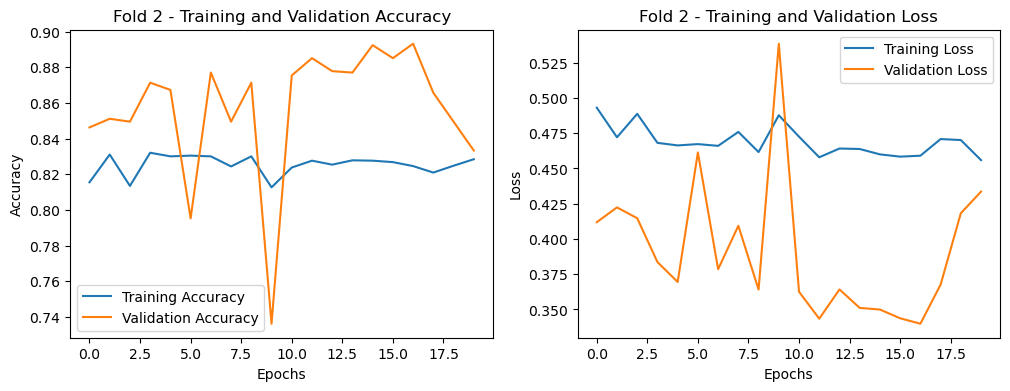

Training fold 3...
Found 4949 images belonging to 2 classes.
Found 1236 images belonging to 2 classes.
Epoch 1/20
155/155 [==============================] - 545s 4s/step - loss: 0.4579 - accuracy: 0.8295 - val_loss: 0.4081 - val_accuracy: 0.8641
Epoch 2/20
155/155 [==============================] - 543s 3s/step - loss: 0.4564 - accuracy: 0.8317 - val_loss: 0.3921 - val_accuracy: 0.8657
Epoch 3/20
155/155 [==============================] - 593s 4s/step - loss: 0.4594 - accuracy: 0.8258 - val_loss: 0.3348 - val_accuracy: 0.8908
Epoch 4/20
155/155 [==============================] - 543s 3s/step - loss: 0.4555 - accuracy: 0.8282 - val_loss: 0.4943 - val_accuracy: 0.7735
Epoch 5/20
155/155 [==============================] - 543s 3s/step - loss: 0.4596 - accuracy: 0.8278 - val_loss: 0.3788 - val_accuracy: 0.8649
Epoch 6/20
155/155 [==============================] - 542s 3s/step - loss: 0.4630 - accuracy: 0.8268 - val_loss: 0.4673 - val_accuracy: 0.7905
Epoch 7/20
155/155 [===================

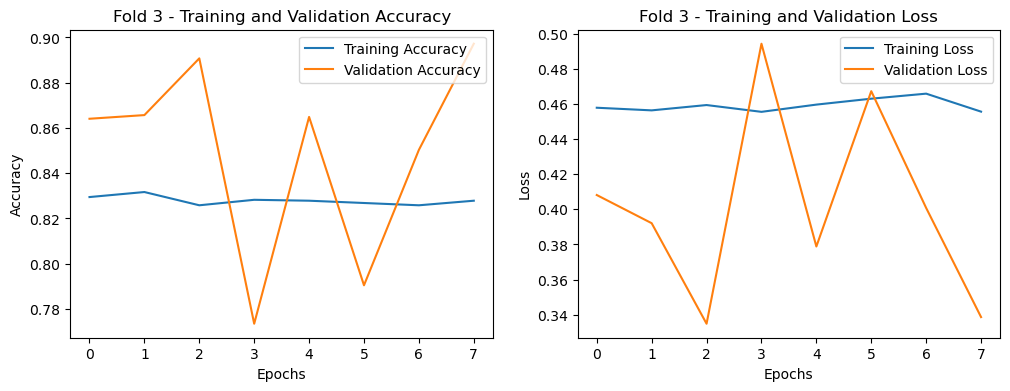

Training fold 4...
Found 4949 images belonging to 2 classes.
Found 1236 images belonging to 2 classes.
Epoch 1/20
155/155 [==============================] - 535s 3s/step - loss: 0.4552 - accuracy: 0.8248 - val_loss: 0.3994 - val_accuracy: 0.8447
Epoch 2/20
155/155 [==============================] - 510s 3s/step - loss: 0.4680 - accuracy: 0.8256 - val_loss: 0.3458 - val_accuracy: 0.8948
Epoch 3/20
155/155 [==============================] - 544s 4s/step - loss: 0.4757 - accuracy: 0.8192 - val_loss: 0.3722 - val_accuracy: 0.8770
Epoch 4/20
155/155 [==============================] - 538s 3s/step - loss: 0.4742 - accuracy: 0.8208 - val_loss: 0.3231 - val_accuracy: 0.8964
Epoch 5/20
155/155 [==============================] - 541s 3s/step - loss: 0.4752 - accuracy: 0.8238 - val_loss: 0.3488 - val_accuracy: 0.8892
Epoch 6/20
155/155 [==============================] - 544s 4s/step - loss: 0.4622 - accuracy: 0.8282 - val_loss: 0.3458 - val_accuracy: 0.8835
Epoch 7/20
155/155 [===================

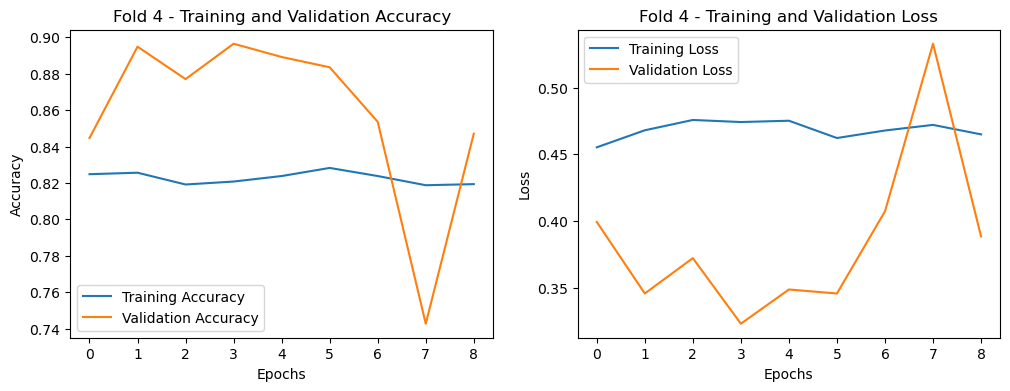

Training fold 5...
Found 4949 images belonging to 2 classes.
Found 1236 images belonging to 2 classes.
Epoch 1/20
155/155 [==============================] - 531s 3s/step - loss: 0.4589 - accuracy: 0.8282 - val_loss: 0.3856 - val_accuracy: 0.8528
Epoch 2/20
155/155 [==============================] - 543s 3s/step - loss: 0.4582 - accuracy: 0.8297 - val_loss: 0.3671 - val_accuracy: 0.8738
Epoch 3/20
155/155 [==============================] - 552s 4s/step - loss: 0.4529 - accuracy: 0.8337 - val_loss: 0.4026 - val_accuracy: 0.8390
Epoch 4/20
155/155 [==============================] - 534s 3s/step - loss: 0.4668 - accuracy: 0.8216 - val_loss: 0.3807 - val_accuracy: 0.8657
Epoch 5/20
155/155 [==============================] - 546s 4s/step - loss: 0.4613 - accuracy: 0.8276 - val_loss: 0.3410 - val_accuracy: 0.8875
Epoch 6/20
155/155 [==============================] - 550s 4s/step - loss: 0.4559 - accuracy: 0.8317 - val_loss: 0.3776 - val_accuracy: 0.8697
Epoch 7/20
155/155 [===================

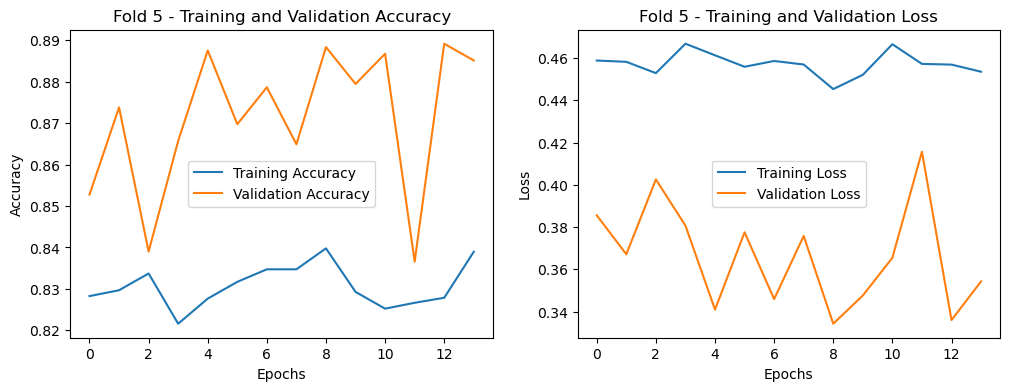

In [7]:
# Cross-validation loop
fold_no = 1
for train_index, val_index in kfold.split(np.zeros(len(train_generator.filenames)), train_generator.classes):
    print(f"Training fold {fold_no}...")
    # Split the data into train and validation
    train_data = np.array(train_generator.filenames)[train_index]
    val_data = np.array(train_generator.filenames)[val_index]
    
    # Create new generators for each fold
    fold_train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='training'
    )
    
    fold_val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='validation'
    )

    # Fit the model for this fold
    history = model.fit(
        fold_train_generator,
        epochs=20,
        validation_data=fold_val_generator,
        callbacks=[early_stopping]
    )

    # Plot the accuracy and loss for this fold
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

    fold_no += 1


In [8]:
# After cross-validation, evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

54/54 [==============================] - 103s 2s/step - loss: 0.3912 - accuracy: 0.8666
Test Accuracy: 86.66%


In [9]:
# Save the model
model.save(r"C:\Users\K M SASTRY\Desktop\CANCER PREDICTION\cnn_model.h5")

C:\Users\K M SASTRY\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


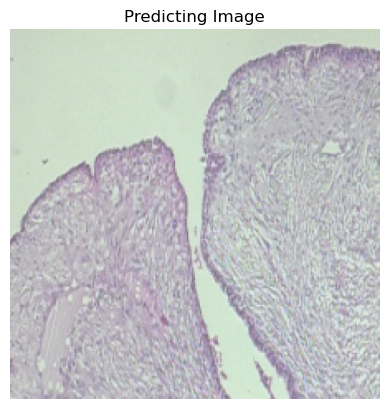

1/1 [==============================] - 1s 772ms/step
The model predicts: Benign (94.18%)
Malignant: 5.82%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the image
img_path = r'K:\PROJECT\ORGANISED DATASET\test\BENIGN\phyllodes_tumor\SOB_B_PT_14-21998AB\40X\SOB_B_PT-14-21998AB-40-007.png'
# Specify the file path of the image you want to predict.

# Load the image and resize it to 224x224 (standard input size for VGG)
img = load_img(img_path, target_size=(224, 224))

# Convert the image to a NumPy array
img_array = img_to_array(img)

# Normalize the image data
img_array = img_array / 255.0

# Expand dimensions to create a batch of one (model expects batch input)
img_array = np.expand_dims(img_array, axis=0)

# Display the image
plt.imshow(img)
plt.title("Predicting Image")
plt.axis('off')  # Hide axes for better visual
plt.show()

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Get the probabilities for both classes
prob_benign = (1 - prediction[0][0]) * 100  # Benign class probability
prob_malignant = prediction[0][0] * 100  # Malignant class probability

# Display the class prediction with probabilities
if prediction[0][0] > 0.5:
    print(f"The model predicts: Malignant ({prob_malignant:.2f}%)")
    print(f"Benign: {prob_benign:.2f}%")
else:
    print(f"The model predicts: Benign ({prob_benign:.2f}%)")
    print(f"Malignant: {prob_malignant:.2f}%")


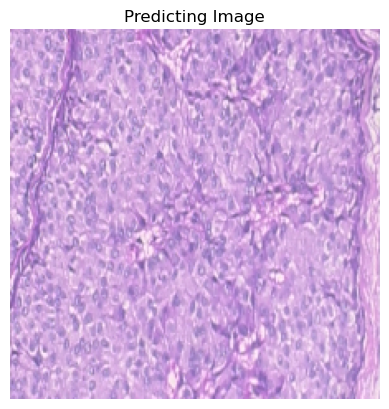

1/1 [==============================] - 0s 142ms/step
The model predicts: Malignant (88.85%)
Benign: 11.15%


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the image
img_path = r'K:\PROJECT\ORGANISED DATASET\test\MALIGNANT\mucinous_carcinoma\SOB_M_MC_14-13413\100X\SOB_M_MC-14-13413-100-014.png'
# Specify the file path of the image you want to predict.

# Load the image and resize it to 224x224 (standard input size for VGG)
img = load_img(img_path, target_size=(224, 224))

# Convert the image to a NumPy array
img_array = img_to_array(img)

# Normalize the image data
img_array = img_array / 255.0

# Expand dimensions to create a batch of one (model expects batch input)
img_array = np.expand_dims(img_array, axis=0)

# Display the image
plt.imshow(img)
plt.title("Predicting Image")
plt.axis('off')  # Hide axes for better visual
plt.show()

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Get the probabilities for both classes
prob_benign = (1 - prediction[0][0]) * 100  # Benign class probability
prob_malignant = prediction[0][0] * 100  # Malignant class probability

# Display the class prediction with probabilities
if prediction[0][0] > 0.5:
    print(f"The model predicts: Malignant ({prob_malignant:.2f}%)")
    print(f"Benign: {prob_benign:.2f}%")
else:
    print(f"The model predicts: Benign ({prob_benign:.2f}%)")
    print(f"Malignant: {prob_malignant:.2f}%")
